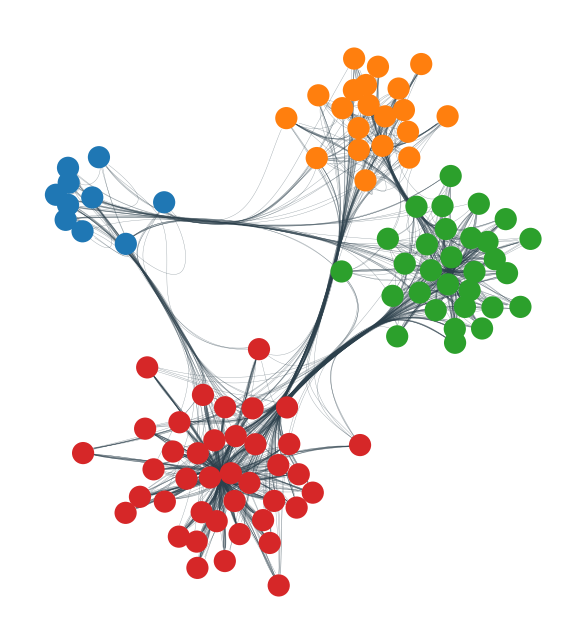

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph

# Increase apparent figure size.
plt.rcParams['figure.dpi'] = 200

# Create a modular graph.
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# Create a dictionary mapping nodes to their community. 
# This information is used position nodes according to their community 
# when using the `community` node layout in netgraph.
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      ax=ax,
)
plt.show()